<a href="https://colab.research.google.com/github/andrewbowen19/SimulationAndModellingDATA604/blob/master/notebooks/bowen_chap05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling and Simulation in Python

Chapter 5

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [ ]:
!pip install --q modsimpy
!pip install --q pint

In [ ]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

## Reading data

Pandas is a library that provides tools for reading and processing data.  `read_html` reads a web page from a file or the Internet and creates one `DataFrame` for each table on the page.

In [ ]:
from pandas import read_html

The data directory contains a downloaded copy of https://en.wikipedia.org/wiki/World_population_estimates

The arguments of `read_html` specify the file to read and how to interpret the tables in the file.  The result, `tables`, is a sequence of `DataFrame` objects; `len(tables)` reports the length of the sequence.

In [ ]:
# Using GitHub upload link
filename = 'https://raw.githubusercontent.com/andrewbowen19/SimulationAndModellingDATA604/master/data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

We can select the `DataFrame` we want using the bracket operator.  The tables are numbered from 0, so `tables[2]` is actually the third table on the page.

`head` selects the header and the first five rows.

In [ ]:
table2 = tables[2]
table2.head()

`tail` selects the last five rows.

In [ ]:
table2.tail()

Long column names are awkard to work with, but we can replace them with abbreviated names.

In [ ]:
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

Here's what the DataFrame looks like now.  

In [ ]:
table2.head()

The first column, which is labeled `Year`, is special.  It is the **index** for this `DataFrame`, which means it contains the labels for the rows.

Some of the values use scientific notation; for example, `2.544000e+09` is shorthand for $2.544 \cdot 10^9$ or 2.544 billion.

`NaN` is a special value that indicates missing data.

### Series

We can use dot notation to select a column from a `DataFrame`.  The result is a `Series`, which is like a `DataFrame` with a single column.

In [ ]:
census = table2.census
census.head()

In [ ]:
census.tail()

Like a `DataFrame`, a `Series` contains an index, which labels the rows.

`1e9` is scientific notation for $1 \cdot 10^9$ or 1 billion.

From here on, we will work in units of billions.

In [ ]:
un = table2.un / 1e9
un.head()

In [ ]:
census = table2.census / 1e9
census.head()

Here's what these estimates look like.

In [ ]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year',
         ylabel='World population (billion)')

# Can save figure to local env
# savefig('figs/chap05-fig01.pdf')

The following expression computes the elementwise differences between the two series, then divides through by the UN value to produce [relative errors](https://en.wikipedia.org/wiki/Approximation_error), then finds the largest element.

So the largest relative error between the estimates is about 1.3%.

In [ ]:
max(abs(census - un) / un) * 100

**Exercise:** Break down that expression into smaller steps and display the intermediate results, to make sure you understand how it works.

1.  Compute the elementwise differences, `census - un`
2.  Compute the absolute differences, `abs(census - un)`
3.  Compute the relative differences, `abs(census - un) / un`
4.  Compute the percent differences, `abs(census - un) / un * 100`


In [ ]:
# Solution goes here
e_diff = census - un

In [ ]:
# Solution goes here
abs_diff = abs(e_diff)

In [ ]:
# Solution goes here
rel_diff = abs(census - un) / un

In [ ]:
# Solution goes here
perc_diff = abs(census - un) / un * 100

`max` and `abs` are built-in functions provided by Python, but NumPy also provides version that are a little more general.  When you import `modsim`, you get the NumPy versions of these functions.

### Constant growth

We can select a value from a `Series` using bracket notation.  Here's the first element:

In [ ]:
census[1950]

And the last value.

In [ ]:
census[2016]

But rather than "hard code" those dates, we can get the first and last labels from the `Series`:

In [ ]:
t_0 = get_first_label(census)

In [ ]:
t_end = get_last_label(census)

In [ ]:
elapsed_time = t_end - t_0

And we can get the first and last values:

In [ ]:
p_0 = get_first_value(census)

In [ ]:
p_end = get_last_value(census)

Then we can compute the average annual growth in billions of people per year.

In [ ]:
total_growth = p_end - p_0

In [ ]:
annual_growth = total_growth / elapsed_time

### TimeSeries

Now let's create a `TimeSeries` to contain values generated by a linear growth model.

In [ ]:
results = TimeSeries()

Initially the `TimeSeries` is empty, but we can initialize it so the starting value, in 1950, is the 1950 population estimated by the US Census.

In [ ]:
results[t_0] = census[t_0]
results

After that, the population in the model grows by a constant amount each year.

In [ ]:
for t in linrange(t_0, t_end):
    results[t+1] = results[t] + annual_growth

Here's what the results looks like, compared to the actual data.

In [ ]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')

# Can save fig by uncommenting below
# savefig('figs/chap05-fig02.pdf')

The model fits the data pretty well after 1990, but not so well before.

### Exercises

**Optional Exercise:**  Try fitting the model using data from 1970 to the present, and see if that does a better job.

Hint: 

1. Copy the code from above and make a few changes.  Test your code after each small change.

2. Make sure your `TimeSeries` starts in 1950, even though the estimated annual growth is based on later data.

3. You might want to add a constant to the starting value to match the data better.

In [ ]:
# Solution goes here

In [ ]:
census.loc[1960:1970]

In [ ]:
# Constructing the above time series analysis from 1970 onward using census data
census_1970 = census.loc[1970:]
un_1970 = un.loc[1970:]
t_0_1950 = t_0
t_0 = get_first_label(census)
t_f = get_last_label(census_1970)
p_0 = get_first_value(census_1970)
p_f = get_last_value(census_1970)

In [ ]:
# Calculating average growth
timeframe = t_f - t_0
growth = p_f - p_0
average_growth = growth / timeframe

In [43]:
# Setting up model based on annual growth since 1970
results = TimeSeries()
results[t_0_1950] = p_0 - 1.2 # Adding a constant value to the model to align to the observed data better

# Adding in projected growth
for t in linrange(t_0_1950, t_f):
    results[t+1] = results[t] + annual_growth


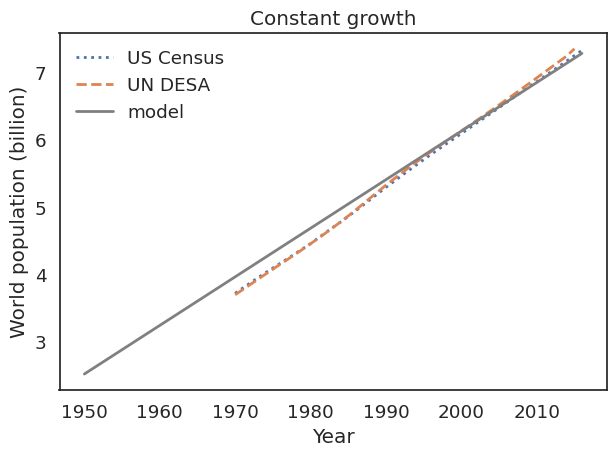

In [44]:
plot(census_1970, ':', label='US Census')
plot(un_1970, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')

When using a different starting sdtae (1970 instead of 1950), the model does not visually fit the data as well as before.